In [157]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import mpl_toolkits.mplot3d
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

# КЛАСТЕРИЗАЦИЯ

Ссылка: https://www.kaggle.com/datasets/erdemtaha/cancer-data

Набор данных о раке молочной железы

Основными характеристиками набора данных являются следующие:

1. id: представляет уникальный идентификатор каждого пациента.

2. diagnosis: указывает на тип рака. Это свойство может принимать значения «M» (злокачественный) или «B» (доброкачественный).

3. radius_mean, texture_mean, perimeter_mean, area_mean, smoothness_mean, compactness_mean, concavity_mean, concave points_mean: представляет собой средние значения визуальных характеристик раковой опухоли.

In [158]:
data = pd.read_csv('Cancer_Data.csv')
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


# Подготовка данных

Размер датасета

In [159]:
data.shape

(569, 33)

Статистическая информация

In [160]:
data.describe(include='all')

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,3.037183e+07,NaN,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,NaN,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,NaN,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,NaN,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,NaN,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,NaN,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN


Информация о наборе данных

In [161]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [162]:
data = data.drop('Unnamed: 32', axis=1)

Выведем название диагнозов

In [163]:
data['diagnosis'].unique()

array(['M', 'B'], dtype=object)

Проверим кол-во строк в каждом диагнозе

In [164]:
data['diagnosis'].value_counts()

,count
diagnosis,
B,357
M,212


Видим, что диагноз В (доброкачественный) содержит 357 записей, диагноз М (злокачественный) - 212.

Разобьем датасет на:

Y - целевая переменная, которую предсказываем (diagnosis).

X - весь набор данных без целевой переменной.

In [165]:
X = data.drop(['diagnosis'], axis=1)
y = data['diagnosis'].map({'B': 0, 'M': 1})
yvals = data['diagnosis']
print(f'X shape: {X.shape} | y shape: {y.shape} ')

X shape: (569, 31) | y shape: (569,) 


Стандартизация данных

In [166]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Воспользуется РСА для визуализации исходных данных

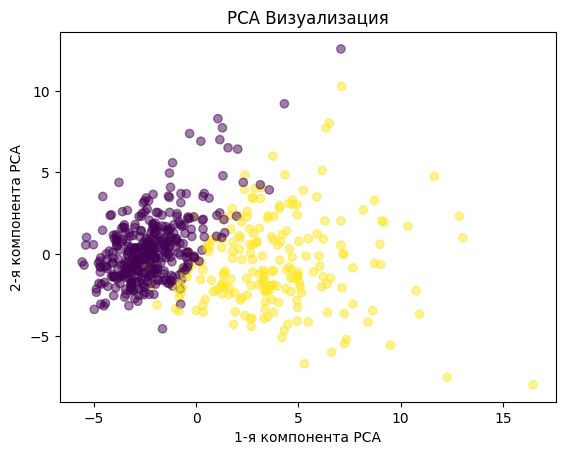

In [167]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, alpha=0.5)
plt.title('РСА Визуализация')
plt.xlabel('1-я компонента РСА')
plt.ylabel('2-я компонента РСА')
plt.show()

# K-Means

Найдем оптимальное количество классов для алгоритма KMeans с помощью метода логтя

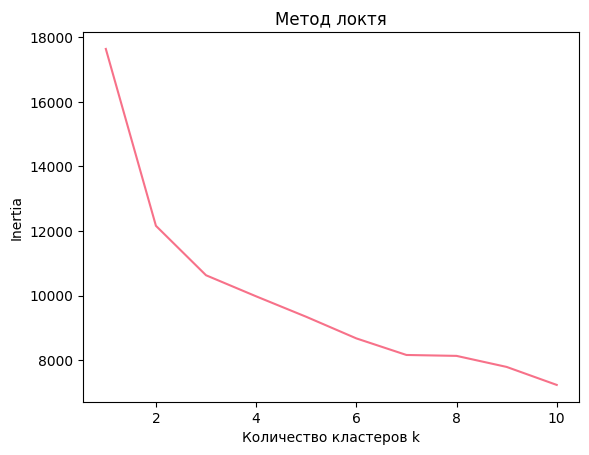

In [168]:
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia)
plt.xlabel('Количество кластеров k')
plt.ylabel('Inertia')
plt.title('Метод локтя')
plt.show()

Оптимальное число кластеров - 2


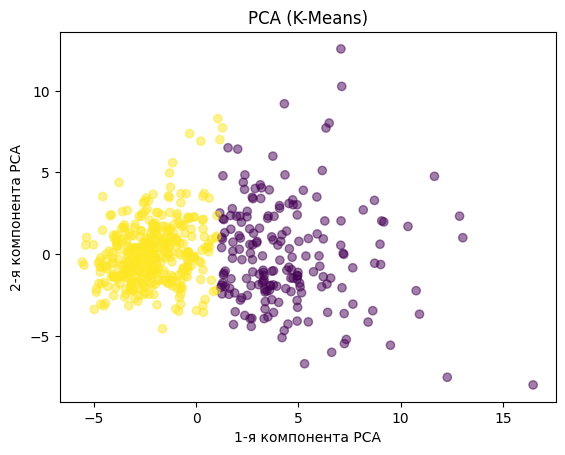

Оценка силуэта: 0.3382381691599185
Скорректированный индекс Рэнда: 0.676504895633523


In [169]:
kmeans = KMeans(n_clusters=2, random_state=42)
labels_kmeans = kmeans.fit_predict(X_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_kmeans, alpha=0.5)
plt.title('РСА (K-Means)')
plt.xlabel('1-я компонента РСА')
plt.ylabel('2-я компонента РСА')
plt.show()

print("Оценка силуэта:", silhouette_score(X_scaled, labels_kmeans))
print("Скорректированный индекс Рэнда:",adjusted_rand_score(y, labels_kmeans))

Значение оценки силуэта указывает на то, что кластеры не идеальны, точки данных не совсем компактны в пределых кластера, но это далеко не худший результат.

Значение скорректированного индекса Рэнда указывает на неплохое кластреное восстановление (значение выше среднего).

# Иерархическая кластеризация

Агломеративная кластеризация

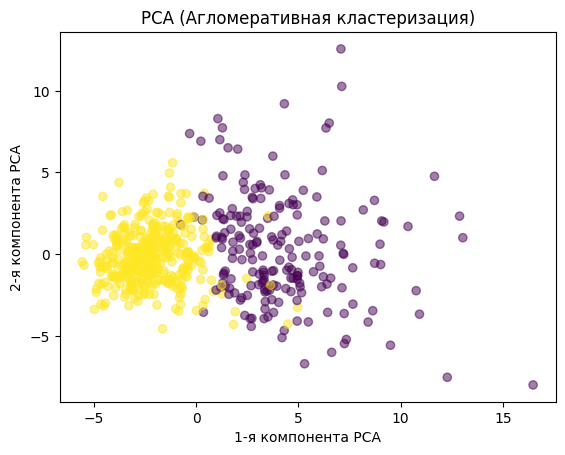

Оценка силуэта: 0.32512633539907987
Скорректированный индекс Рэнда: 0.5865167068167211


In [170]:
aggl = AgglomerativeClustering(n_clusters=2)
labels_aggl = aggl.fit_predict(X_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_aggl, alpha=0.5)
plt.title('РСА (Агломеративная кластеризация)')
plt.xlabel('1-я компонента РСА')
plt.ylabel('2-я компонента РСА')
plt.show()

print("Оценка силуэта:", silhouette_score(X_scaled, labels_aggl))
print("Скорректированный индекс Рэнда:",adjusted_rand_score(y, labels_aggl))

Значение оценки силуэта почти такое же, как и для K-Means (ниже).

Значение скорректированного индекса Рэнда меньше, чем для K-Means.

# DBSCAN

In [171]:
from ipywidgets import interact

@interact(epsilon=(0, 5.0, 0.05), min_samples=(3, 50, 1))
def plot_dbscan(epsilon, min_samples):
    dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
    labels_dbsc = dbscan.fit_predict(X_scaled)

    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_dbsc, alpha=0.5)
    plt.title('РСА (DBSCAN)')
    plt.xlabel('1-я компонента РСА')
    plt.ylabel('2-я компонента РСА')
    plt.show()
    print("Оценка силуэта:", silhouette_score(X_scaled, labels_dbsc))
    print("Скорректированный индекс Рэнда:",adjusted_rand_score(y, labels_dbsc))

interactive(children=(FloatSlider(value=2.5, description='epsilon', max=5.0, step=0.05), IntSlider(value=26, d…

При подборе радиуса окрестности (eps) и минимального количества соседей (точек данных) в радиусе eps не удалось найти такие значения, при которых оценки получались бы хорошими. Во многих случаях получается наложение одного кластера на другой.

K-Means показывает более высокие оценки силуэта и скорректированного индекса Рэнда, что говорит о том, что он лучше разделяет кластеры и лучше согласуется с истинными метками, чем агломеративная кластеризация.